Task 1 — Load & Inspect the Dataset
Load the dataset into your notebook.
Display first and last 5 rows.
Print .shape and .info().
Show list of unique product categories.
Identify columns that require cleaning or type conversion.

Task 2 — Clean the Dataset
Identify missing values using .isnull().sum().
Fill missing numeric values (discount_price, rating, etc.) using mean or median.
Fill missing categorical values (brand, category) with "Unknown".
Remove all duplicate rows.
Convert numeric columns to their correct data types.
Reset index after cleaning.

In [27]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\Nishath Tabassum\Downloads\amazon_products_dataset.csv")



In [28]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [29]:
df.tail()

,title,brand,category,actual_price,discount_price,rating,rating_count
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0
1999,Smartphone with AMOLED Display,Boat,Headphones,31662.0,31047.0,3.2,1064.0


In [30]:
df.shape

(2000, 7)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [ ]:
df['category'].unique()

array(['Laptop', 'Smartwatch', 'Headphones', 'Camera', 'Monitor',
       'Speaker', 'Tablet', 'Smartphone', nan], dtype=object)

In [ ]:
df.describe(include='all')

,title,brand,category,actual_price,discount_price,rating,rating_count
count,2000,2000,1998,1998.000000,1999.000000,1996.000000,1996.000000
unique,10,10,8,NaN,NaN,NaN,NaN
top,Wireless Bluetooth Headphones,Boat,Tablet,NaN,NaN,NaN,NaN
freq,224,214,276,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,39595.531031,37136.040070,2.952655,10019.726954
std,NaN,NaN,NaN,23126.895054,23023.843063,1.126949,5801.490045
min,NaN,NaN,NaN,360.000000,103.000000,1.000000,5.000000
25%,NaN,NaN,NaN,19931.000000,17114.500000,2.000000,4959.000000
50%,NaN,NaN,NaN,39279.000000,36686.000000,2.900000,9885.000000
75%,NaN,NaN,NaN,59755.500000,57188.500000,3.900000,15227.000000


In [34]:
df.isnull().sum()

title             0
brand             0
category          2
actual_price      2
discount_price    1
rating            4
rating_count      4
dtype: int64

In [ ]:
num_cols = ['discount_price', 'actual_price', 'rating', 'rating_count']
for col in num_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\Nishath Tabassum\AppData\Local\Temp\ipykernel_29512\972400751.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Nishath Tabassum\AppData\Local\Temp\ipykernel_29512\972400751.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [21]:
cat_cols = ['brand', 'category']

for col in cat_cols:
    if col in df.columns:
        df[col].fillna("Unknown", inplace=True)
df.head()

C:\Users\Nishath Tabassum\AppData\Local\Temp\ipykernel_29512\1260676306.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,Unknown,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,Unknown,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,Unknown,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,Unknown,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,Unknown,1999,NaN,0


In [36]:
df.drop_duplicates(inplace=True)
df

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [37]:

df['rating']= pd.to_numeric(df['rating'], errors='coerce')
df

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [38]:
df.reset_index(drop=True, inplace=True)
df

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


Task 3 — Data Analysis
Identify the top 5 most expensive products (actual_price).
Find the brand with the highest number of products.
Compute the average discount percentage for each brand.
Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
Compute category-wise average price.

In [ ]:
top5_expensive = df.sort_values(by='actual_price', ascending=False).head(5)
top5_expensive

,title,brand,category,actual_price,discount_price,rating,rating_count
1383,Android Tablet,JBL,Laptop,79993.0,78094.0,3.0,7666.0
1974,Gaming Laptop,LG,Monitor,79869.0,77173.0,2.6,5232.0
1403,4K Action Camera,Sony,Headphones,79857.0,77469.0,2.7,1379.0
1351,Android Tablet,Sony,Monitor,79853.0,78831.0,4.8,7596.0
42,Gaming Laptop,Apple,Smartwatch,79826.0,76919.0,3.8,10252.0


In [39]:
brand_count = df['brand'].value_counts().head(1)
brand_count


brand
Boat    214
Name: count, dtype: int64

In [ ]:
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

In [42]:
avg_discount_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
avg_discount_brand


brand
Apple      12.721996
Boat       12.546502
LG         11.968668
HP         11.501202
OnePlus    11.380987
JBL        11.370137
Dell       11.165004
Sony       10.381971
Mi         10.162308
Samsung     9.326064
Name: discount_percent, dtype: float64

In [44]:
high_rated_popular = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
high_rated_popular.head()


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0,3.568354
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0,0.871720
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0,1.193370


In [45]:
category_avg_price = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
category_avg_price


category
Laptop        40822.874477
Camera        40352.246094
Monitor       39948.259259
Tablet        39943.815217
Speaker       39682.207843
Headphones    39576.147679
Smartwatch    38316.913934
Smartphone    37909.529412
Name: actual_price, dtype: float64

Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)
Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())
Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count

In [ ]:
import numpy as np
# discount_percent
if 'discount_price' not in df.columns:
    df['discount_price'] = df['actual_price'] * 0.9
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
#price_category
def price_category(price):
    if price < 500:
        return "Budget"
    elif price < 2000:
        return "Midrange"
    else:
        return "Premium"
df['price_category'] = df['actual_price'].apply(price_category)
#popularity_score
if 'rating_count' not in df.columns:
    df['rating_count'] = 100
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)
df.head()


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Premium,19.924860
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Premium,22.795289
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,Premium,14.879318
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Premium,36.156019
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Premium,46.858883


In [48]:
df.columns


Index(['title', 'brand', 'category', 'actual_price', 'discount_price',
       'rating', 'rating_count', 'discount_percent', 'price_category',
       'popularity_score'],
      dtype='object')

In [49]:
top10_popular=df.sort_values(by='popularity_score',ascending=False).head(10)
premium_high_discount = df[(df['price_category'] == "Premium") & (df['discount_percent'] > 40)]
if 'user_attr' in df.columns:
    bluetooth_products = df[df['user_attr'].str.contains("Bluetooth", case=False, na=False)]
else:
    bluetooth_products = pd.DataFrame()  
threshold = df['popularity_score'].quantile(0.7)
filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= threshold)
]
top10_popular, premium_high_discount, bluetooth_products, filtered_products


(                               title    brand    category  actual_price  \
 1418  Smartphone with AMOLED Display  OnePlus      Laptop       22786.0   
 297       Portable Bluetooth Speaker  Samsung      Camera       52713.0   
 502    Wireless Bluetooth Headphones  Samsung      Camera       17858.0   
 1400         High Resolution Monitor     Dell  Headphones       11025.0   
 878          Laptop with SSD Storage    Apple  Smartwatch        4436.0   
 1489         High Resolution Monitor    Apple      Laptop       21711.0   
 848          High Resolution Monitor       HP  Smartphone       11660.0   
 854       Portable Bluetooth Speaker  Samsung  Smartwatch       19284.0   
 1625                   Gaming Laptop     Dell      Tablet       15099.0   
 637                 4K Action Camera     Dell  Headphones       35058.0   
 
       discount_price  rating  rating_count  discount_percent price_category  \
 1418         22301.0     5.0       18510.0          2.128500        Premium   
 2

In [ ]:
# Average discount_percent per brand
avg_discount_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
# Average popularity_score per price_category
avg_popularity_price_cat = df.groupby('price_category')['popularity_score'].mean()
# Category with highest average discount
avg_discount_category = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)
highest_discount_category = avg_discount_category.head(1)
# Revenue potential per brand
df['revenue_potential'] = df['actual_price'] * df['rating_count']
revenue_per_brand = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)


Task 5 — Data Visualization 
Use the specific plot type mentioned:
Price distribution → Histogram + KDE
Relationship between price and rating → Scatter Plot
Category-wise average rating → Bar Plot
Brand product count → Count Plot
Numeric feature correlations → Heatmap

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')


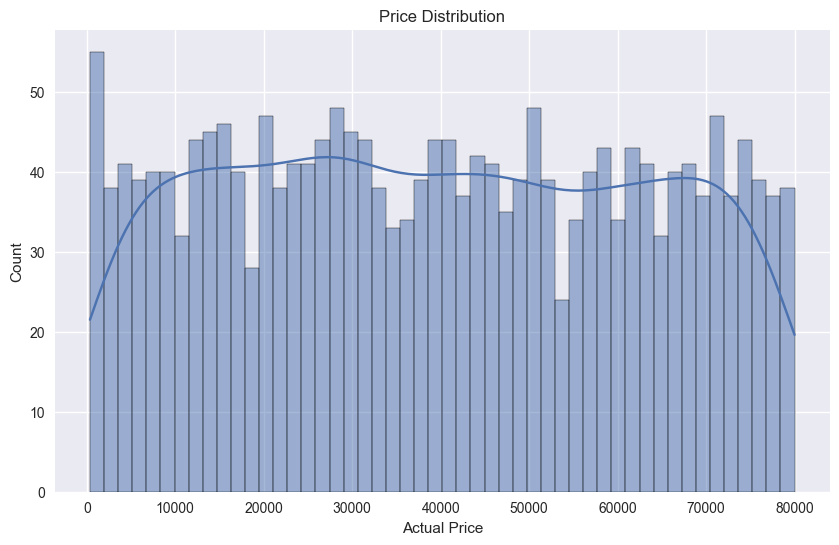

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'], bins=50, kde=True)
plt.xlabel("Actual Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()


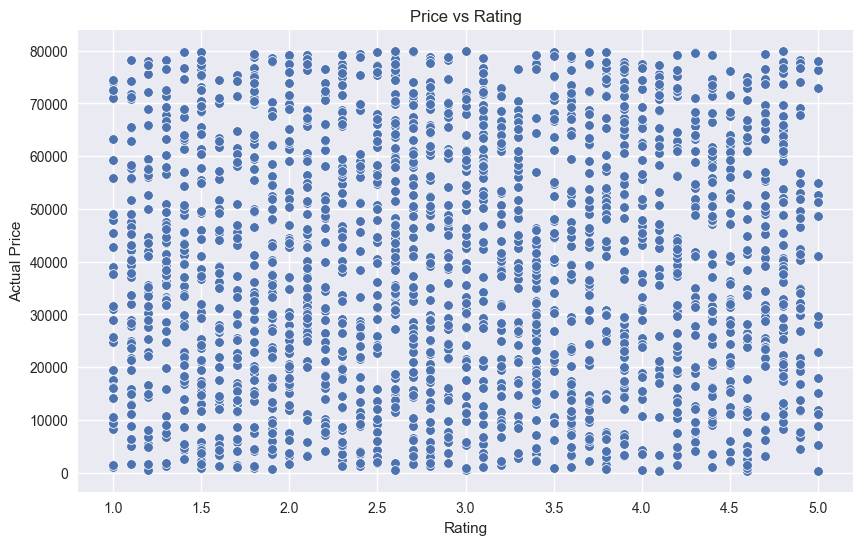

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='rating', y='actual_price', data=df)
plt.xlabel("Rating")
plt.ylabel("Actual Price")
plt.title("Price vs Rating")
plt.show()


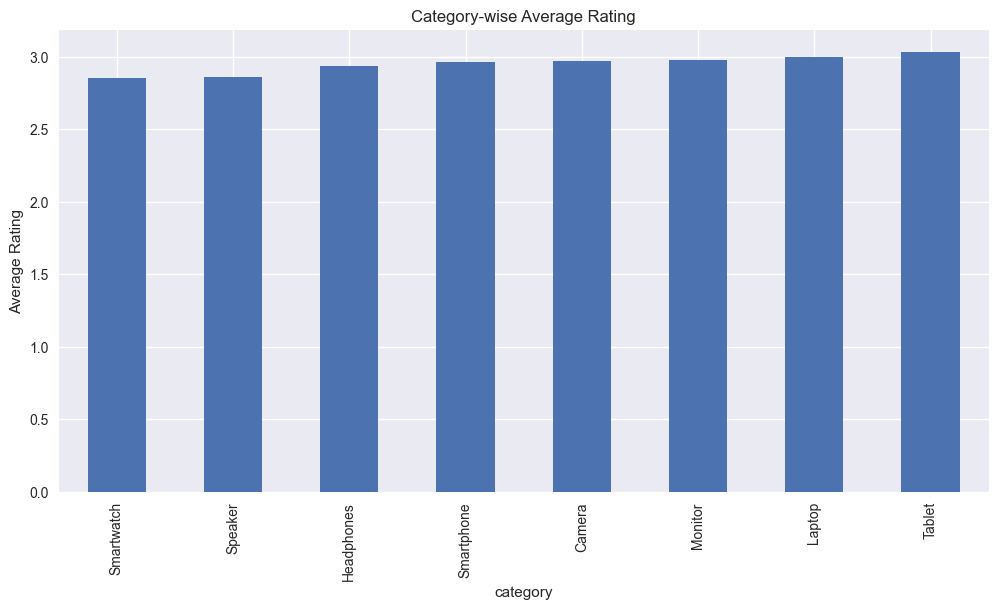

In [54]:
category_avg_rating = df.groupby('category')['rating'].mean().sort_values()
plt.figure(figsize=(12,6))
category_avg_rating.plot(kind='bar')
plt.ylabel("Average Rating")
plt.title("Category-wise Average Rating")
plt.show()


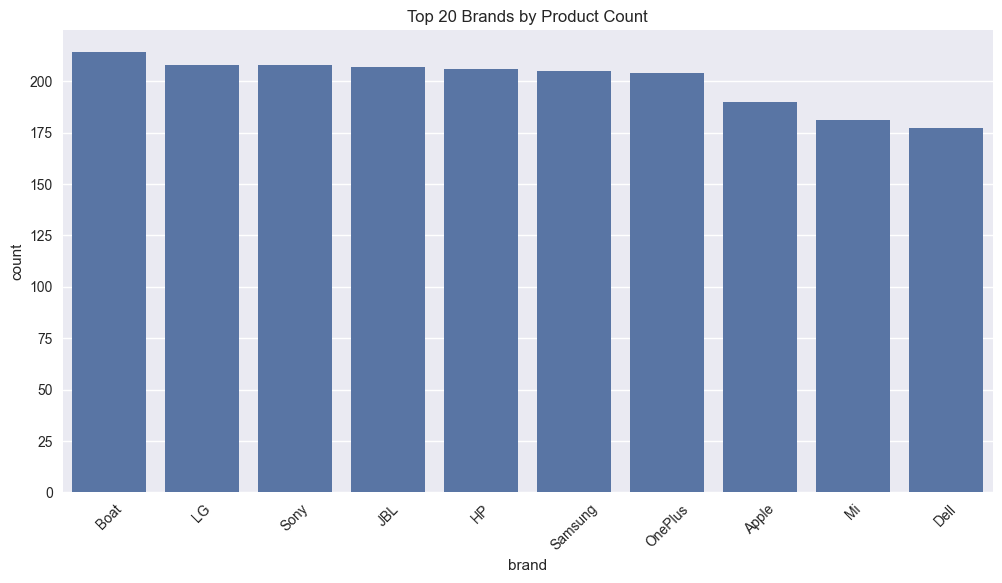

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='brand', data=df, order=df['brand'].value_counts().index[:20])
plt.xticks(rotation=45)
plt.title("Top 20 Brands by Product Count")
plt.show()


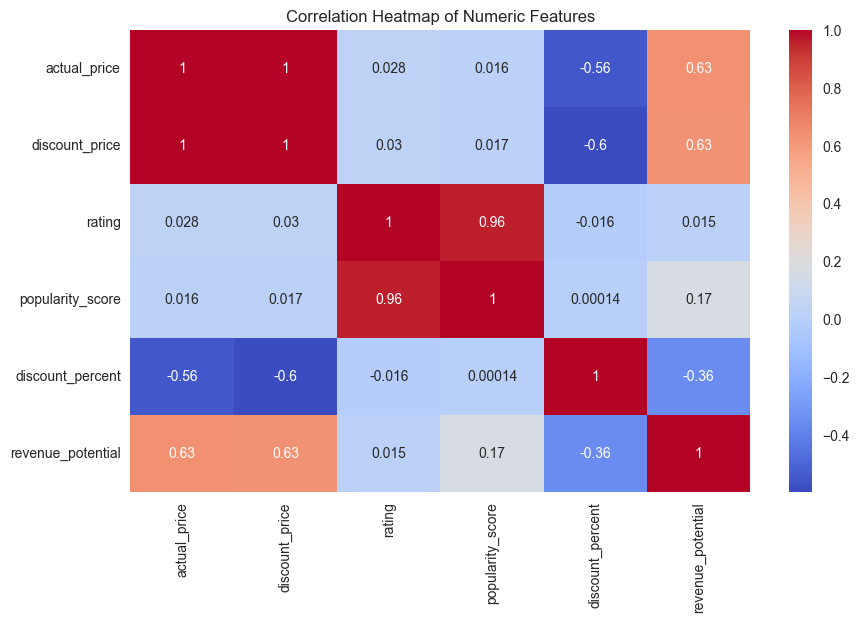

In [56]:
numeric_cols = ['actual_price', 'discount_price', 'rating', 'popularity_score', 'discount_percent', 'revenue_potential']
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
